# Convolutional Neural Network

# **Group No :151**
## **Group Member Names:**

Peyala Samarasimha Reddy - 2023AA05072 100% Contribution

Monisha G - 2023AA05536 100% Contribution

Akshay Mohan - 2023AA05315 100% Contribution

Sreelakshmi Ajith - 2023AA05316 100% Contribution

In [14]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
Y
  Successfully uninstalled tensorflow-2.17.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)


In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time.
tf.random.set_seed(42)   # sets the graph-level random seed

## Dataset - MNIST

In [5]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest,Ytest) = mnist.load_data()

# Display size of dataset
Xtrain = Xtrain.reshape((60000,28,28,1))
Xtrain = Xtrain.astype('float32')/255

Xtest = Xtest.reshape((10000,28,28,1))
Xtest = Xtest.astype('float32')/255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


## Create a CNN Model

In [6]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and specify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1) ))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 3
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu" ))

cnnModel.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModel.add(layers.Dense(64, activation="relu" ))

# Layer 5
cnnModel.add(layers.Dense(32, activation="relu" ))

# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))

cnnModel.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,082 (371.41 KB)

 Trainable params: 95,082 (371.41 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [8]:
# train the model

history = cnnModel.fit(Xtrain, Ytrain, epochs = 25, batch_size = 64, validation_split = 0.1)

Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 61ms/step - accuracy: 0.8367 - loss: 0.5159 - val_accuracy: 0.9810 - val_loss: 0.0624
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.9862 - val_loss: 0.0500
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.9874 - loss: 0.0409 - val_accuracy: 0.9862 - val_loss: 0.0525
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9887 - val_loss: 0.0441
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 62ms/step - accuracy: 0.9919 - loss: 0.0246 - val_accuracy: 0.9875 - val_loss: 0.0483
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.9934 - loss: 0.0216 - val_accuracy: 0.9888 - val_loss: 0.0490
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9893 - val_loss: 0.0443
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9945 - loss: 0.0159 - 

In [10]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.005073322914540768
Final training accuracy  0.9984074234962463


## Results and Outputs

In [11]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9885 - loss: 0.0761


In [12]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.05195753276348114
Testing accuracy  0.9919999837875366


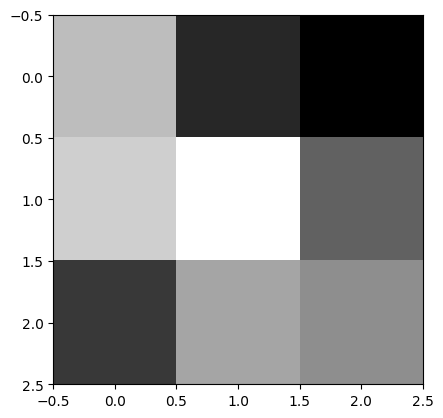

In [13]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

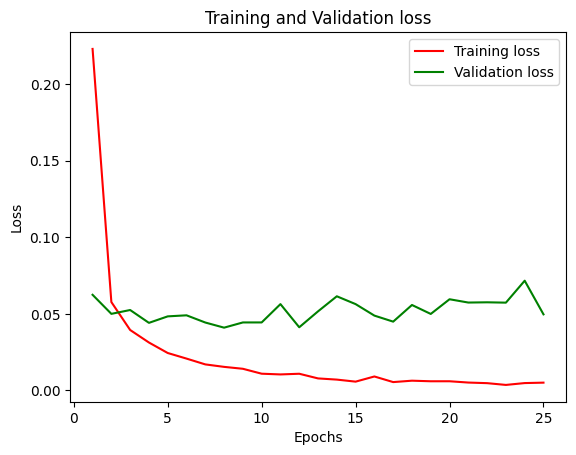

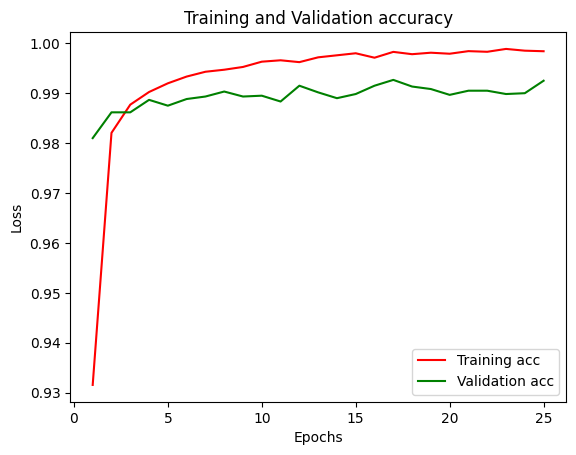

In [16]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix generation

### Prediction for a specific testing data generte confusion matrix

In [17]:
Y_prediction = cnnModel.predict(Xtest)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_prediction, axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest,axis = 1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [18]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



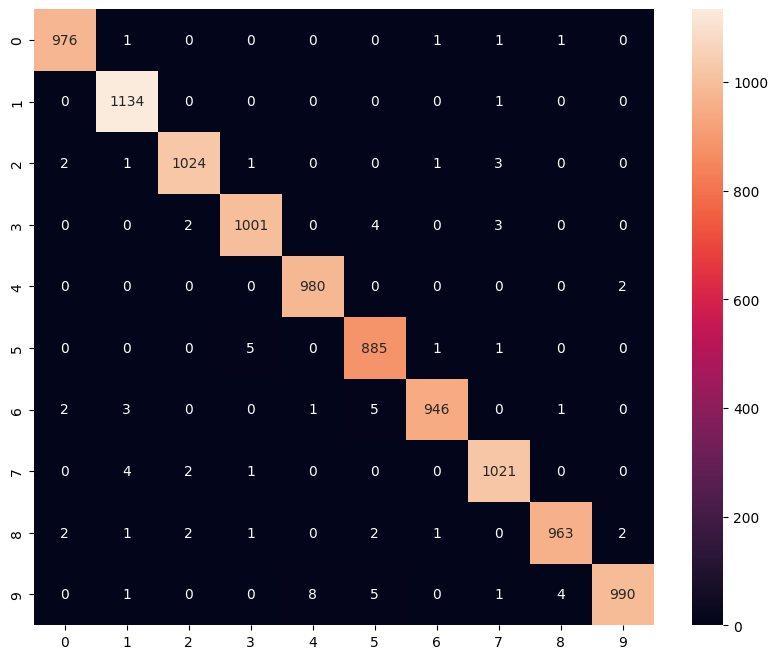

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

# **Modify the code to get a better testing accuracy.**
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer
- Train for more epochs for better graphs

- Try using CIFAR dataset

## **CIFAR-10 Image Classification using a 3-Layer CNN with 256 and 128 Hidden Units and RMSprop Optimizer**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3224 - loss: 1.8183 - val_accuracy: 0.5253 - val_loss: 1.3370
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.5640 - loss: 1.2252 - val_accuracy: 0.5517 - val_loss: 1.3373
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.6434 - loss: 1.0145 - val_accuracy: 0.6436 - val_loss: 1.0460
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6898 - loss: 0.8838 - val_accuracy: 0.6634 - val_loss: 1.0166
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7209 - loss: 0.7969 - val_accuracy: 0.6781 - val_loss: 0.9968
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7474 - loss: 0.7358 - val_accuracy: 0.6786 - val_loss: 1.0786
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.7614 - loss: 0.6970 - val_accuracy: 0.6868 - val_loss: 1.0583
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7743 -

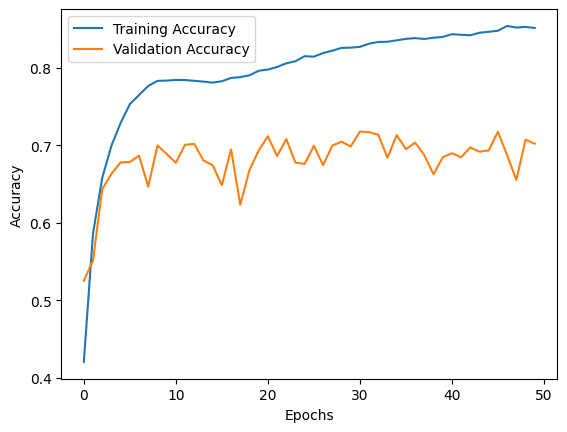

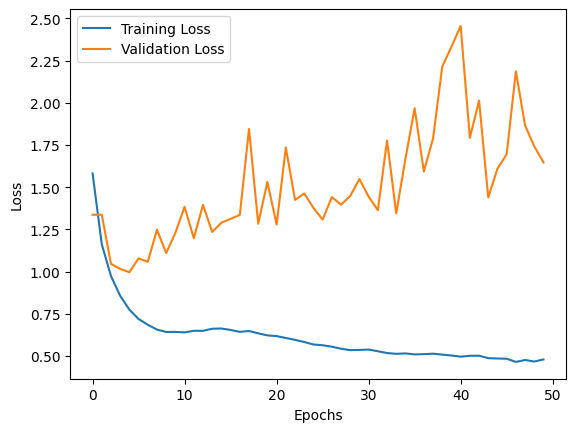

313/313 - 4s - 12ms/step - accuracy: 0.7022 - loss: 1.6467


Test accuracy: 0.7021999955177307


In [20]:
# Importing required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model building
model = models.Sequential()

# Add first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the results
model.add(layers.Flatten())

# Add first dense layer (hidden units increased to 256)
model.add(layers.Dense(256, activation='relu'))

# Add second dense layer to increase hidden layers
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(10, activation='softmax'))

cnnModel.summary()

# Compile the model using RMSprop optimizer instead of Adam
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (increase epochs to 50)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Plotting training and validation accuracy over epochs



In [22]:
model = models.Sequential()

# Add first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the results
model.add(layers.Flatten())

# Add first dense layer (hidden units increased to 256)
model.add(layers.Dense(256, activation='relu'))

# Add second dense layer to increase hidden layers
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(10, activation='softmax'))

cnnModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,248 (1.09 MB)

 Trainable params: 95,082 (371.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190,166 (742.84 KB)

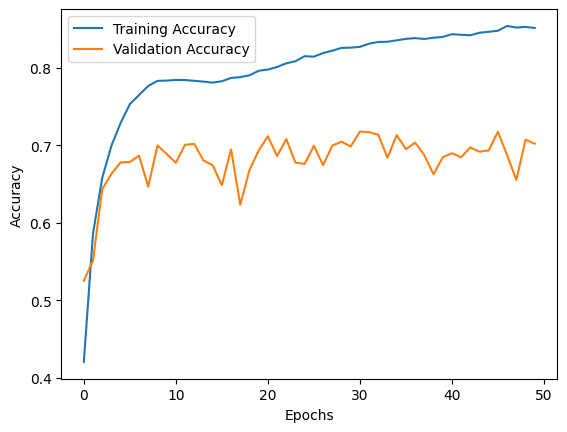

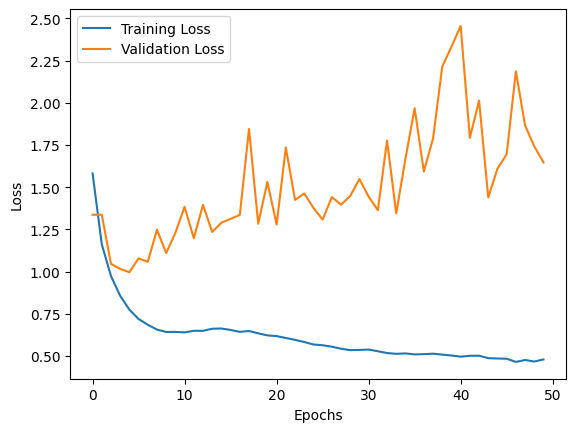

313/313 - 5s - 18ms/step - accuracy: 0.7022 - loss: 1.6467


Test accuracy: 0.7021999955177307


In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model if needed
model.save('cnn_cifar10_model.h5')